In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.snowball import EnglishStemmer

In [2]:
data_dir = "./data/hw7"
data = pd.read_csv(f"{data_dir}/yelp_2k.csv", usecols=[3,5])
corpus = data.text
data.head()

,stars,text
0,1,This car wash sucks. Paid $40 for the Ultimat...
1,5,I was referred to Earnie by friends and since ...
2,1,"The food is okay, but they have the worst serv..."
3,1,Opting out from the noise and hustle of Flo's ...
4,5,"Basically, unlimited steak. If you like steak,..."


In [3]:
data.shape

(2000, 2)

## Bag of words

In [22]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        stemmer = EnglishStemmer()
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [70]:
def get_bag_of_words(corpus, stop_words=None, max_df=1.0, min_df=1):    
    vectorizer = StemmedCountVectorizer(stop_words=stop_words, max_df=max_df, min_df=min_df)
    bag_of_words = vectorizer.fit_transform(corpus)
    return vectorizer, bag_of_words

In [44]:
def get_sorted_words_frequencies(bag_of_words, vectorizer):
    frequencies = bag_of_words.sum(axis=0)
    words_frequencies = [(word, frequencies[0, index]) for word, index in vectorizer.vocabulary_.items()]
    sorted_words_frequencies =sorted(words_frequencies, key = lambda x: x[1], reverse=True)
    return sorted_words_frequencies

In [128]:
def plot_frequecy_rank(sorted_words_frequencies, filename):
    num_words = len(sorted_words_frequencies)
    sorted_frequencies = np.array(sorted_words_frequencies)[:, 1].astype(int)
    fig, ax = plt.subplots()
    ax.set_title("Word Frequencies")
    ax.set_xlabel('word rank')
    ax.set_ylabel('word count')
    plt.plot(range(num_words), sorted_frequencies,'b.')
    plt.savefig(f'reports/hw7/{filename}.png')
    plt.show()

In [130]:
vectorizer, bag_of_words = get_bag_of_words(corpus)
sorted_words_frequencies = get_sorted_words_frequencies(bag_of_words, vectorizer)

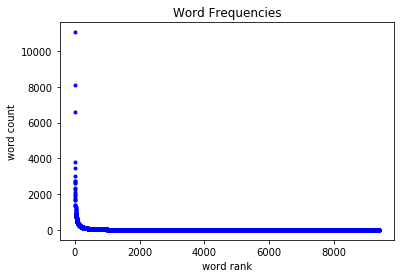

In [131]:
plot_frequecy_rank(sorted_words_frequencies, filename='1')

#### Stop words
By printing out the first 100 high frequent words

In [132]:
sorted_words_frequencies[:100]

[('the', 11041),
 ('and', 8107),
 ('to', 6565),
 ('was', 3817),
 ('it', 3444),
 ('of', 3040),
 ('for', 2728),
 ('in', 2706),
 ('my', 2606),
 ('is', 2604),
 ('that', 2326),
 ('they', 2295),
 ('this', 2116),
 ('we', 2029),
 ('you', 1962),
 ('with', 1817),
 ('on', 1720),
 ('have', 1690),
 ('not', 1650),
 ('but', 1409),
 ('had', 1387),
 ('me', 1330),
 ('at', 1305),
 ('so', 1252),
 ('be', 1196),
 ('were', 1125),
 ('are', 1122),
 ('place', 1065),
 ('food', 953),
 ('go', 944),
 ('there', 942),
 ('get', 933),
 ('as', 929),
 ('time', 908),
 ('he', 900),
 ('if', 899),
 ('all', 856),
 ('when', 843),
 ('servic', 835),
 ('out', 830),
 ('would', 806),
 ('our', 776),
 ('one', 769),
 ('she', 765),
 ('back', 758),
 ('up', 735),
 ('from', 727),
 ('veri', 724),
 ('an', 712),
 ('like', 710),
 ('their', 708),
 ('just', 705),
 ('here', 697),
 ('will', 692),
 ('order', 689),
 ('no', 686),
 ('great', 672),
 ('good', 671),
 ('about', 619),
 ('them', 608),
 ('can', 601),
 ('do', 598),
 ('or', 594),
 ('what', 59

Choosing: `['the', 'and', 'to', 'was', 'it', 'of', 'for', 'in', 'is', 'that', 'this', 'with', 'on', 'at', 'are', 'were', 'be', 'as', 'an']`

## Using stop words list

In [78]:
stop_words_list=['the', 'and', 'to', 'was', 'it', 'of', 'for', 'in', 'is', 'that', 'this', 'with', 'on', 'at', 'are', 'were', 'be', 'as', 'an']
vectorizer2, bag_of_words2 = get_bag_of_words(corpus, stop_words=stop_words_list)
sorted_words_frequencies2 = get_sorted_words_frequencies(bag_of_words2, vectorizer2)

In [79]:
len(sorted_words_frequencies2)

9387

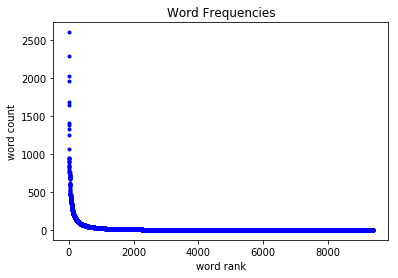

In [133]:
plot_frequecy_rank(sorted_words_frequencies2,  filename='2')

## min_df/max_df

In [151]:
stop_words_list=['the', 'and', 'to', 'was', 'it', 'of', 'for', 'in', 'is', 'that', 'this', 'with', 'on', 'at', 'are', 'were', 'be', 'as', 'an']
vectorizer3, bag_of_words3 = get_bag_of_words(corpus, stop_words=stop_words_list, max_df=0.3)
sorted_words_frequencies3 = get_sorted_words_frequencies(bag_of_words3, vectorizer3)

In [152]:
len(sorted_words_frequencies3)

9373

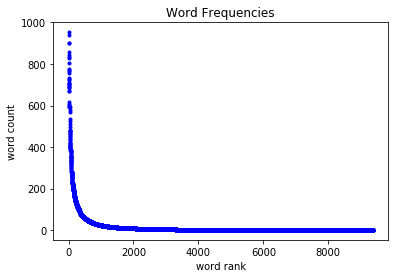

In [153]:
plot_frequecy_rank(sorted_words_frequencies3,  filename='3')

## Part 2: Text-Retrieval

In [154]:
from sklearn.neighbors import NearestNeighbors

In [176]:
query_string = 'horrible customer service'

k = 5
knn = NearestNeighbors(n_neighbors=k, metric='cosine')
knn.fit(bag_of_words3)

test = [query_string]
test_BOW = vectorizer3.transform(test)

distances, indices = knn.kneighbors(test_BOW, n_neighbors=k)

In [177]:
distances, indices

(array([[0.37005921, 0.54530114, 0.55555556, 0.56005865, 0.56966852]]),
 array([[1808,   90,  729, 1721,    9]]))

In [186]:
pd.set_option('display.max_colwidth', -1)
print(corpus[indices[0]])

1808    Rogers ...\n\n1) is over priced\n2) have horrible customer service\n3) faulty and incorrect billing\n4) poor customer service\n5) not enough options\n6) never arrive for an appointment                                                                                                                                                                                                                                              
90      Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  He will not repair the issue he caused, and told me to go somewhere else.  \n\nSave yourself the hassle, there are plenty of other quality pool companies out there.  \n\nTake care!
729     Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and will

## Part 3: Classification with Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words3, data.stars, test_size=0.1)
pd.set_option('display.max_colwidth', 50)

assert X_train.shape[0] + X_test.shape[0] == corpus.shape[0] 

In [208]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train.toarray(), y_train)

/Users/qingemeng/Documents/dev/cs498aml/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
logisticRegression.score(X_test, y_test)

0.91

In [213]:
probabilities = logisticRegression.predict_proba(X_train)
probabilities.shape

(1800, 2)

array([0.98266073, 0.01733927])